# 4_Libreria WFDB: Teorema de Parseval

En este apartado se verificara el teorema de Parseval para una cierta señal de un registro WFDB.

Este teorema establece la igualdad que existe entre la sumatoria de los cuadrados de los valores de una secuencia y la sumatoria de los cuadrados de los valores de su DFT dividio por la longitud de la secuencia

En este primer bloque se realiza la apretura de la señal, la DFT y la graica ilustrativa de ambas

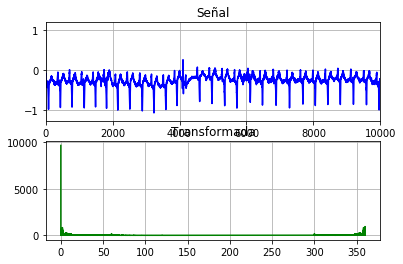

In [3]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

n = 40980
t = np.arange( 0, n, 1 )                           

signal, fields = wfdb.io.rdsamp('108', pb_dir='mitdb',   sampto = n)

resf = fields.get( 'fs' )/n                         
rangof = np.arange( 0, 360 , resf) 

Y = np.fft.fft( signal[:,0] )
Ymodu = abs(Y)

plt.figure(1)
plt.subplot( 211 )
plt.plot( t, signal[:,0] , 'b'  )
plt.title( 'Señal' )
plt.grid( True )
plt.xlim( -0.5, 10000 )

plt.subplot( 212 )
plt.plot( rangof, Ymodu , 'g'  )
plt.title( 'Transformada' )
plt.grid( True )

En el siguiente bloque se calculan los dos terminos de la igualdad para luego compararlos

In [11]:
termino1 = 0 
for i in range (0, 40980, 1):
    termino1 = termino1 + (signal[i,0])**2

termino2 = 0
for i in range (0, 40980, 1):
    termino2 = termino2 + (Ymodu[i])**2/n

if termino1 == termino2:
    print("Teorema comprobado")
else:
    porcentaje = abs(termino1-termino2) * 100 / termino1
    print("La diferencia entre ambos terminos es de un",porcentaje,"%")

La diferencia entre ambos terminos es de un 1.595566915219271e-13 %


La diferencia entre ambos términos es despreciable y puede decirse que se cumple la relación de Parseval. Esta diferencia puede interpretarse como la señal de error que se analizó en el ejemplo anterior